In [1]:
# Utilities

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay
)
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve



from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from sklearn.model_selection import train_test_split, StratifiedKFold,RepeatedStratifiedKFold, cross_val_score, KFold, RandomizedSearchCV,GridSearchCV, RepeatedKFold


from sklearn import tree 
import pydotplus 
from IPython.display import Image

In [2]:
df=pd.read_csv("../../prepared_ravdess_features.csv")
df.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,frame_width,length_ms,zero_crossings_sum,mfcc_mean,...,stft_std,stft_min,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,speech,fearful,normal,Dogs are sitting by the door,2nd,F,2,3737,16995,-33.485947,...,0.335533,0.0,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,speech,angry,normal,Dogs are sitting by the door,1st,F,2,3904,13906,-29.502108,...,0.352380,0.0,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,speech,happy,strong,Dogs are sitting by the door,2nd,F,2,4671,18723,-30.532463,...,0.352270,0.0,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,speech,surprised,normal,Kids are talking by the door,1st,F,2,3637,11617,-36.059555,...,0.360552,0.0,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,song,happy,strong,Dogs are sitting by the door,2nd,F,2,4404,15137,-31.405996,...,0.350655,0.0,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872


In [3]:
df_copy=df.copy()

cat_var=["vocal_channel","statement","repetition","sex"]
le=preprocessing.LabelEncoder()
for i in cat_var:
    df_copy[i]=le.fit_transform(df_copy[i])
df_copy.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,frame_width,length_ms,zero_crossings_sum,mfcc_mean,...,stft_std,stft_min,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,1,fearful,normal,0,1,0,2,3737,16995,-33.485947,...,0.335533,0.0,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,1,angry,normal,0,0,0,2,3904,13906,-29.502108,...,0.352380,0.0,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,1,happy,strong,0,1,0,2,4671,18723,-30.532463,...,0.352270,0.0,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,1,surprised,normal,1,0,0,2,3637,11617,-36.059555,...,0.360552,0.0,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,0,happy,strong,0,1,0,2,4404,15137,-31.405996,...,0.350655,0.0,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872


In [4]:
# one-hot encoding of categorical feature "emotion"
categorical_col = ["emotion"]

df_copy = pd.get_dummies(df_copy, columns=categorical_col)
df_copy.head()

,vocal_channel,emotional_intensity,statement,repetition,sex,frame_width,length_ms,zero_crossings_sum,mfcc_mean,mfcc_std,...,kur,skew,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised
0,1,normal,0,1,0,2,3737,16995,-33.485947,134.654860,...,9.406061,0.273153,0,0,0,1,0,0,0,0
1,1,normal,0,0,0,2,3904,13906,-29.502108,130.485630,...,19.564187,0.292157,1,0,0,0,0,0,0,0
2,1,strong,0,1,0,2,4671,18723,-30.532463,126.577110,...,4.881241,0.302659,0,0,0,0,1,0,0,0
3,1,normal,1,0,0,2,3637,11617,-36.059555,159.725160,...,13.040259,-0.081014,0,0,0,0,0,0,0,1
4,0,strong,0,1,0,2,4404,15137,-31.405996,122.125824,...,7.485109,0.414872,0,0,0,0,1,0,0,0


In [5]:
le=preprocessing.LabelEncoder()
df_copy["emotional_intensity"]=le.fit_transform(df_copy["emotional_intensity"])
df_copy.head()

,vocal_channel,emotional_intensity,statement,repetition,sex,frame_width,length_ms,zero_crossings_sum,mfcc_mean,mfcc_std,...,kur,skew,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised
0,1,0,0,1,0,2,3737,16995,-33.485947,134.654860,...,9.406061,0.273153,0,0,0,1,0,0,0,0
1,1,0,0,0,0,2,3904,13906,-29.502108,130.485630,...,19.564187,0.292157,1,0,0,0,0,0,0,0
2,1,1,0,1,0,2,4671,18723,-30.532463,126.577110,...,4.881241,0.302659,0,0,0,0,1,0,0,0
3,1,0,1,0,0,2,3637,11617,-36.059555,159.725160,...,13.040259,-0.081014,0,0,0,0,0,0,0,1
4,0,1,0,1,0,2,4404,15137,-31.405996,122.125824,...,7.485109,0.414872,0,0,0,0,1,0,0,0


In [6]:
# Print confusion matrix
def print_confMatrix(y_test,y_test_pred):
    cm=confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Greens")
    plt.show()

In [7]:
# Print Roc Curve 
def print_rocCurve(clf,X_test,y_test):
    y_tmp=clf.predict_proba(X_test)
    plot_roc(y_test, clf.predict_proba(X_test),figsize=(10,6))
    plt.show()
    #print(roc_auc_score(y_test, y_tmp))
    #print(roc_auc_score(y_test, y_tmp[:,1]))

In [8]:
# Print Precision-Recall Curve
def print_precrecCurve(clf,X_test,y_test):
    plot_precision_recall(y_test, clf.predict_proba(X_test),figsize=(10,7))
    plt.show()

In [9]:
def cumulativeGain_AND_Lift_Curve(clf,X_test,y_test):
    fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8,6))
    plot_cumulative_gain(y_test, clf.predict_proba(X_test), ax=axs[0],figsize=(10,7))
    plot_lift_curve(y_test, clf.predict_proba(X_test), ax=axs[1],figsize=(10,7))
    plt.tight_layout()
    plt.show()  

In [10]:
#Print Decision Tree

def print_DecisionTree(dt):
    plt.figure(figsize=(20, 4), dpi=300)
    plot_tree(dt, feature_names=df_copy.columns, filled=True)
    plt.show() 

In [11]:
# Funzione per fare la GridSearch()

def customGridSearch(X_train, y_train, model, tuned_parameters,score):

    print("____________________________________________ START GRID SEARCH ____________________________________________")

    results = {}
    
    print("------- Score = " + score +  "------- \n")
        
    k_fold = StratifiedKFold() # 5 split default, 10 repetitions default
    print("> Fold = " + str(k_fold) + "\n")
        
    clf = GridSearchCV(model, tuned_parameters, error_score='raise', cv=k_fold, scoring = score, return_train_score=True)
    clf.fit(X_train, y_train)

    print("> Best Parameter set: \n")
    best = clf.best_params_
    print(best)
        
    print("\n> Grid scores:\n")

    means = clf.cv_results_['mean_train_score']
    stds = clf.cv_results_['std_train_score']

    print("...........RESULTS FOR TRAINING.........")
    print("........................................")

   
    
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
                          
    print("____________________________________________ END GRID SEARCH ____________________________________________")
        
    results[score] = best
    
    return results

In [12]:
col=[x for x in df_copy.columns if x!="emotional_intensity"]
X=df_copy[col].values
y = np.array(df_copy["emotional_intensity"])


#holdout -> emotional intensity bilanciato quindi no stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

# Tecnica SHHP

In [13]:
#Esperimento 1: f1_macro

check_params = {'max_depth': [None, 2, 5, 10, 15, 20],
                'min_samples_split': [2, 5, 10, 15, 20],
                'min_samples_leaf': [1, 5, 10, 15, 20],
                "criterion": ["gini", "entropy"] 
                }

grid = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=check_params,
    cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=0), 
    refit=True, # -> ci dice che alla fine il modello verrà riallenato con la migliore combinazione di iperparametri
    scoring="f1_macro"
)

grid.fit(X_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=0),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 5, 10, 15, 20],
                         'min_samples_split': [2, 5, 10, 15, 20]},
             scoring='f1_macro')

In [14]:
clf = grid.best_estimator_
clf

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20)

In [15]:
print(grid.best_params_, grid.best_score_)

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 20, 'min_samples_split': 2} 0.7190712537093736


In [16]:
clf.score(X_test, y_test)

0.731404958677686

In [17]:
learner = DecisionTreeClassifier(criterion="gini", max_depth=15, min_samples_leaf=20, min_samples_split=15)
classifier = learner.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       383
           1       0.72      0.72      0.72       343

    accuracy                           0.74       726
   macro avg       0.73      0.73      0.73       726
weighted avg       0.74      0.74      0.74       726



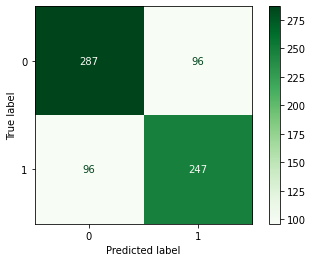

In [18]:
print_confMatrix(y_test,predictions)

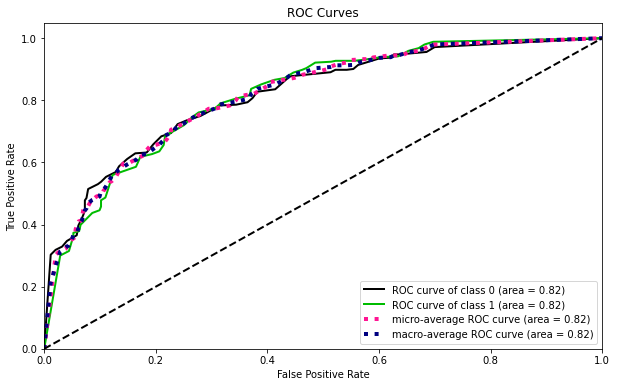

In [19]:
print_rocCurve(learner,X_test,y_test)

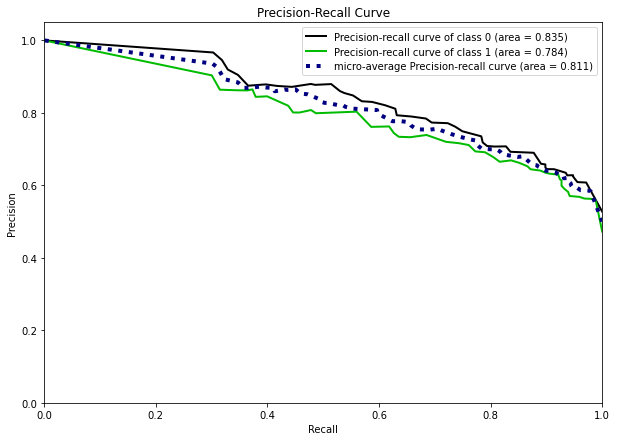

In [20]:
print_precrecCurve(learner,X_test,y_test)

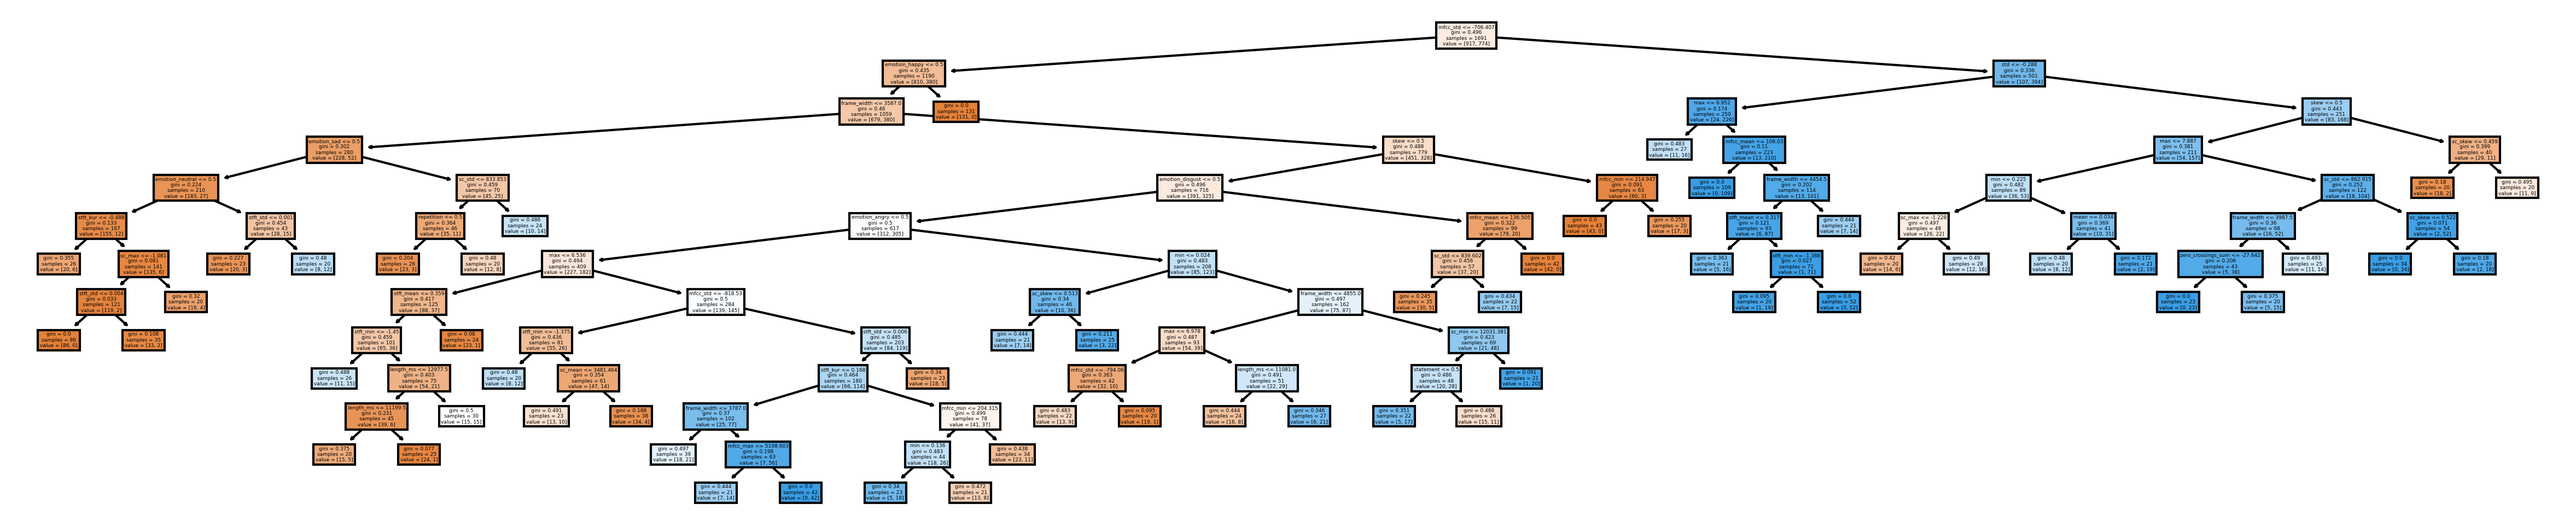

In [21]:
#Print Decision Tree

print_DecisionTree(learner)


In [22]:
imp_dict = {attr: clf.feature_importances_[i] for i, attr in enumerate(col)}
{k: v for k, v in sorted(imp_dict.items(), key=lambda item: item[1], reverse=True)}


{'mfcc_min': 0.2994824455758302,
 'emotion_neutral': 0.0935102424468406,
 'length_ms': 0.07626374953818738,
 'emotion_angry': 0.073733342011398,
 'max': 0.06652689833960244,
 'kur': 0.06638584412281655,
 'sc_min': 0.03199743688535379,
 'stft_min': 0.028330035109740102,
 'emotion_fearful': 0.027299832678629562,
 'mfcc_std': 0.027226143636659067,
 'zero_crossings_sum': 0.02633079048135906,
 'stft_kur': 0.02206552015022614,
 'sc_mean': 0.020789730697595696,
 'emotion_sad': 0.01659618277877936,
 'stft_std': 0.016372219864138133,
 'emotion_surprised': 0.014157966105059667,
 'mfcc_max': 0.013695390239780543,
 'sex': 0.013666235782964808,
 'stft_skew': 0.012999531134465019,
 'emotion_calm': 0.010249322609607453,
 'sc_max': 0.009985885541542424,
 'sc_std': 0.007806072343468741,
 'min': 0.006943504677047389,
 'std': 0.006513508028703927,
 'repetition': 0.00535180978004906,
 'sc_kur': 0.0030506334448064066,
 'stft_mean': 0.002669725995348424,
 'vocal_channel': 0.0,
 'statement': 0.0,
 'frame_wid

vocal_channel 0.0
statement 0.0
frame_width 0.0
mfcc_mean 0.0
sc_skew 0.0
mean 0.0
emotion_disgust 0.0
emotion_happy 0.0
skew 0.0005652256924442049
sc_kur 0.0038580215856118556
sex 0.0041102571846971
std 0.0042706456089902384
stft_mean 0.005498482287527139
mfcc_max 0.006154609857959554
repetition 0.006539272974082033
sc_mean 0.006982199730193189
sc_std 0.006983135185330967
emotion_sad 0.011775302873574383
emotion_surprised 0.01231147054466713
emotion_calm 0.013256943364591937
stft_std 0.015293513606301894
stft_min 0.01583713638951919
mfcc_std 0.01677759547581233
stft_kur 0.016920058639220338
sc_max 0.019518015278056418
stft_skew 0.021436506059451507
zero_crossings_sum 0.024327098664992025
max 0.026446835841581456
sc_min 0.031310318989794465
emotion_fearful 0.03308307214803808
min 0.03493354697044649
kur 0.057656340566022306
emotion_neutral 0.06737554777072534
emotion_angry 0.07611350986271148
length_ms 0.09104569859408275
mfcc_min 0.3696196382535743


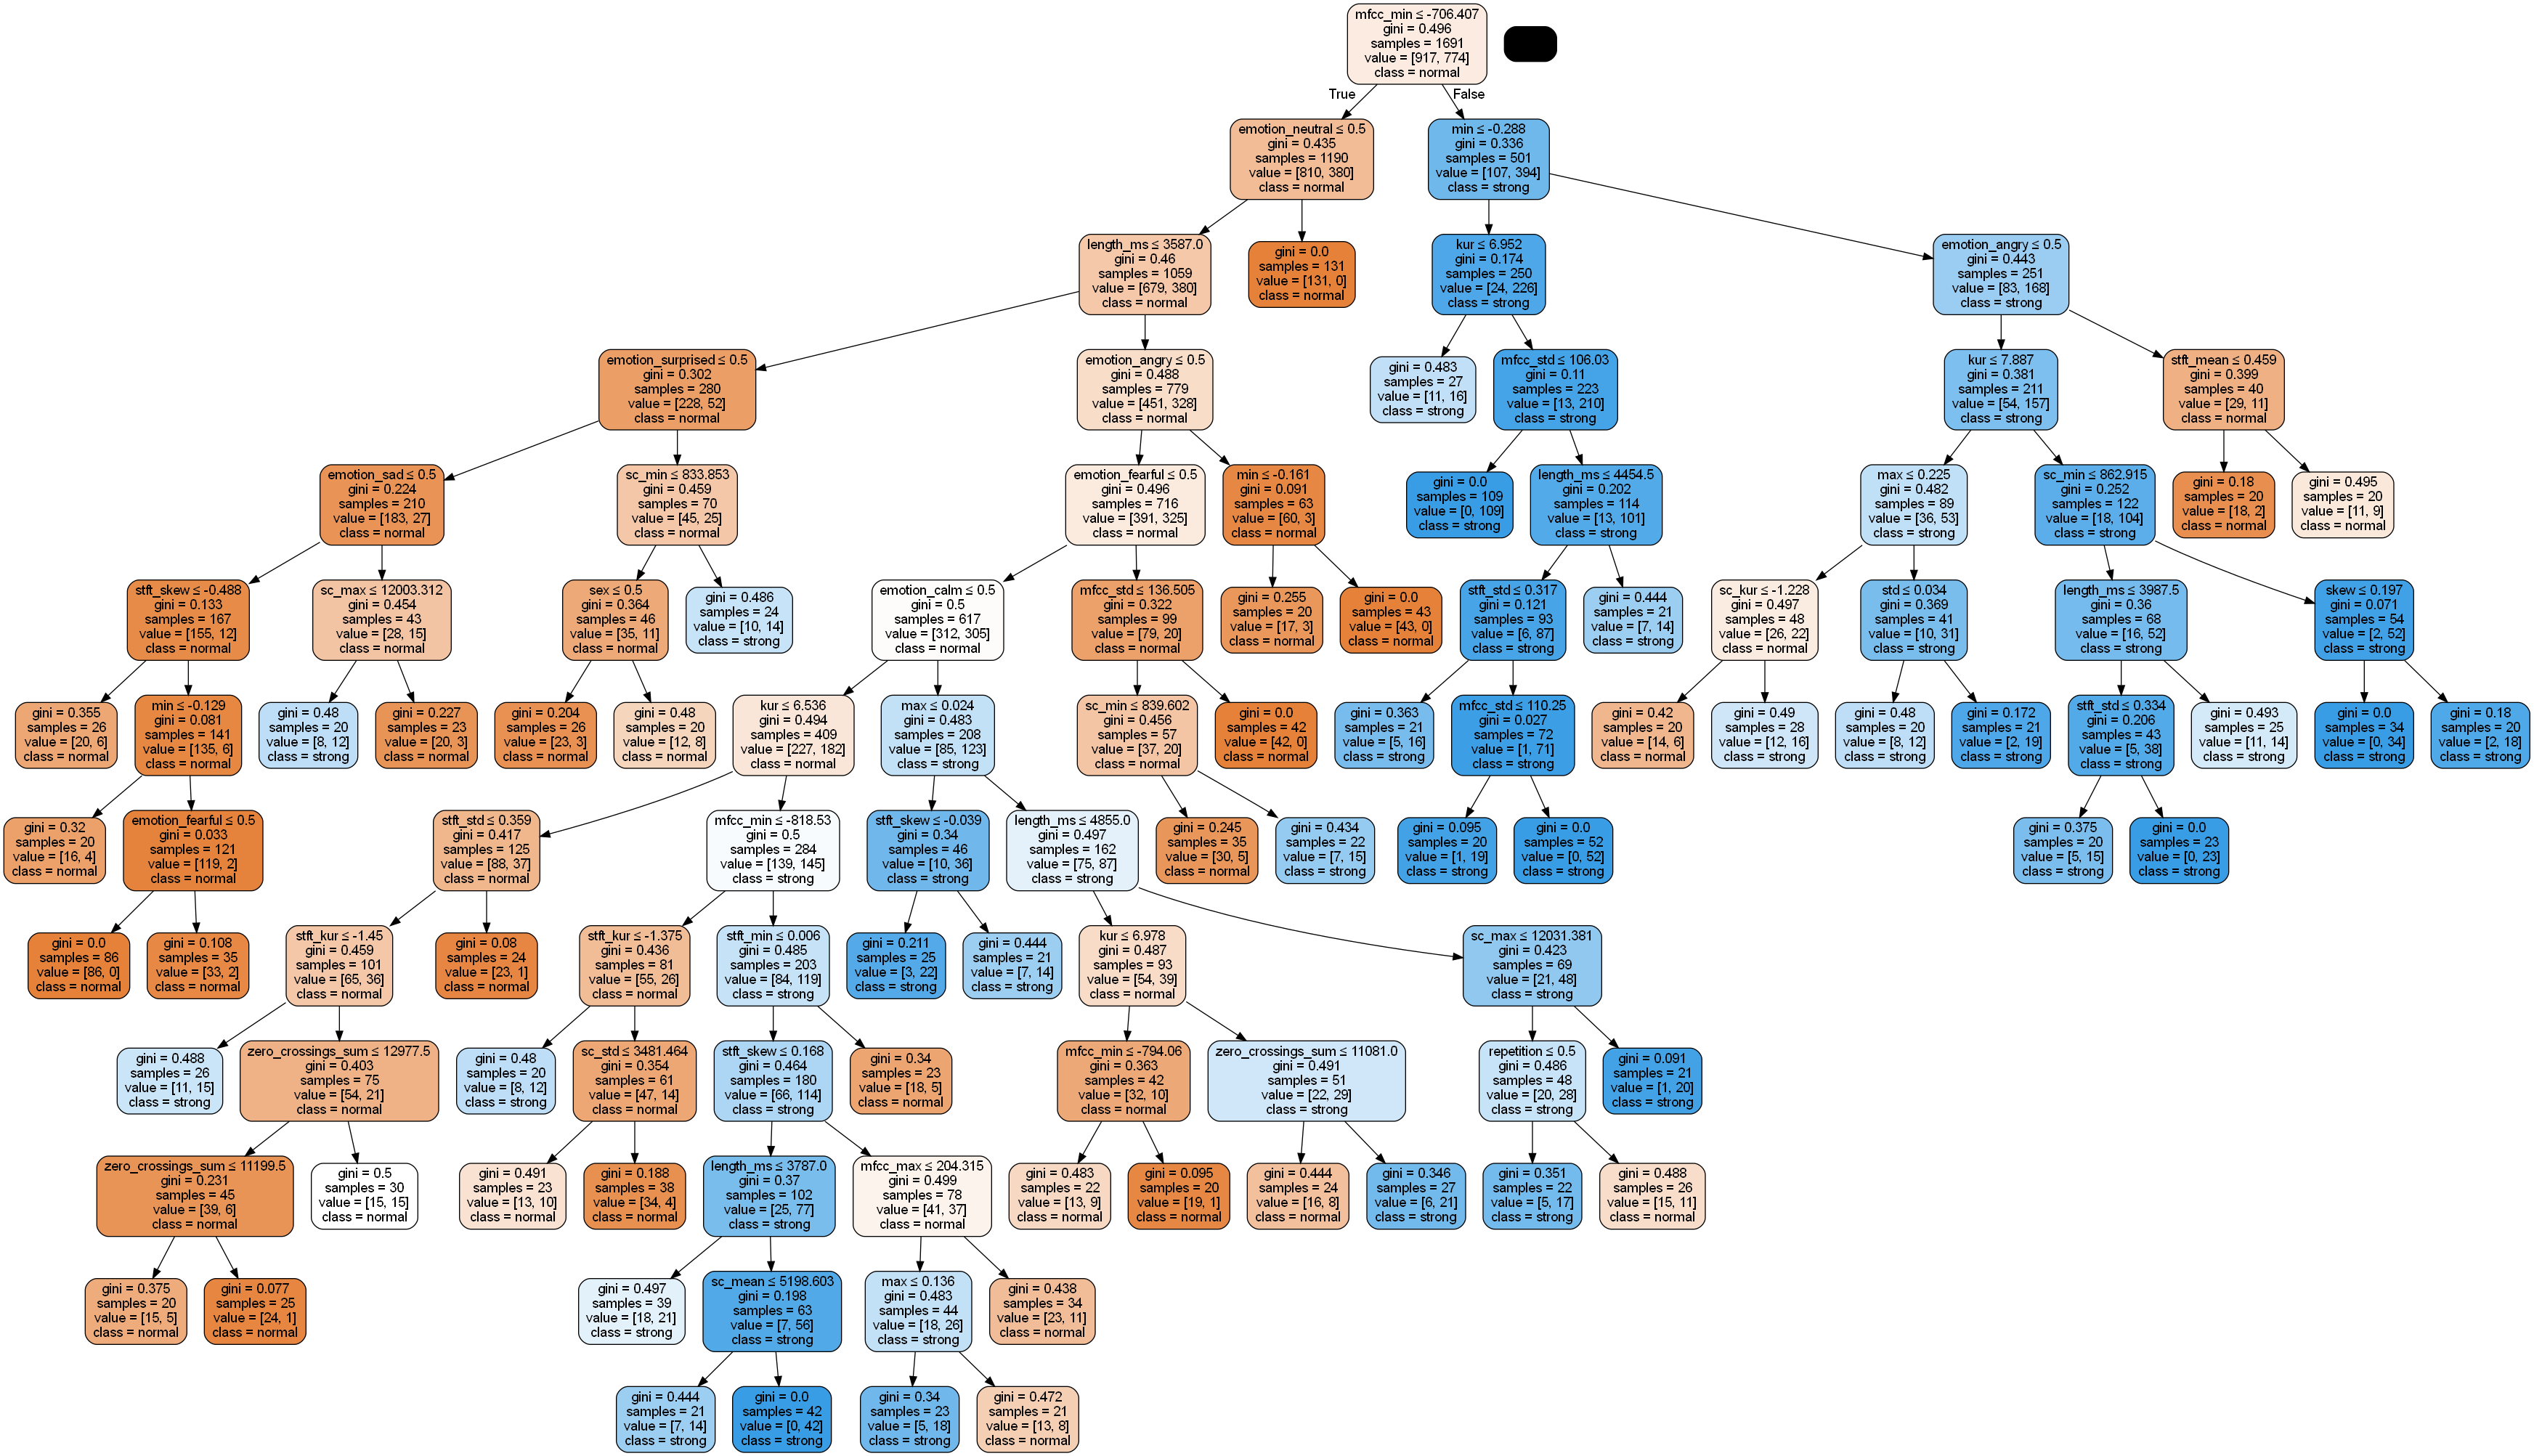

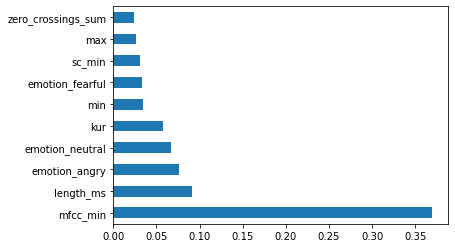

In [23]:
clf = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 15, min_samples_leaf = 20, min_samples_split = 15)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

zipped = zip(col, clf.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1])

for i, imp in zipped:
    print(i, imp)

feat_importances = pd.Series(clf.feature_importances_, index=col)
feat_importances.nlargest(10).plot(kind='barh')

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=col,
                                class_names=['strong' if x == 1 else 'normal' for x in clf.classes_],  
                                filled=True, rounded=True,  
                                special_characters=True,
                                max_depth=15)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [24]:
feature_importanti=[]
for i, imp in zipped:
    if imp>0.02:
        print(i, imp)
        feature_importanti.append(i)
print(feature_importanti)

stft_skew 0.021436506059451507
zero_crossings_sum 0.024327098664992025
max 0.026446835841581456
sc_min 0.031310318989794465
emotion_fearful 0.03308307214803808
min 0.03493354697044649
kur 0.057656340566022306
emotion_neutral 0.06737554777072534
emotion_angry 0.07611350986271148
length_ms 0.09104569859408275
mfcc_min 0.3696196382535743
['stft_skew', 'zero_crossings_sum', 'max', 'sc_min', 'emotion_fearful', 'min', 'kur', 'emotion_neutral', 'emotion_angry', 'length_ms', 'mfcc_min']


# ultimo esperimento

Prendo le 10 feature più importanti ottenute dall'esperimento precedente e le utilizzo per classifiare emotional_intensity

In [25]:
X=df_copy[feature_importanti].values
y = np.array(df_copy["emotional_intensity"])

#holdout -> emotional intensity bilanciato quindi no stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

In [26]:
#Esperimento 1: f1_macro

check_params = {'max_depth': [None, 2, 5, 10, 15, 20],
                'min_samples_split': [2, 5, 10, 15, 20],
                'min_samples_leaf': [1, 5, 10, 15, 20],
                "criterion": ["gini", "entropy"] 
                }

grid = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=check_params,
    cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=0), 
    refit=True, # -> ci dice che alla fine il modello verrà riallenato con la migliore combinazione di iperparametri
    scoring="f1_macro"
)

grid.fit(X_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=0),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 5, 10, 15, 20],
                         'min_samples_split': [2, 5, 10, 15, 20]},
             scoring='f1_macro')

In [27]:
print(grid.best_params_, grid.best_score_)

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 15, 'min_samples_split': 5} 0.7179667029847988


In [28]:
learner = DecisionTreeClassifier(criterion="gini", max_depth=15, min_samples_leaf=20, min_samples_split=15)
classifier = learner.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       383
           1       0.74      0.69      0.71       343

    accuracy                           0.74       726
   macro avg       0.74      0.74      0.74       726
weighted avg       0.74      0.74      0.74       726



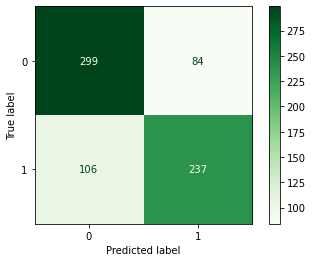

In [29]:
print_confMatrix(y_test,predictions)

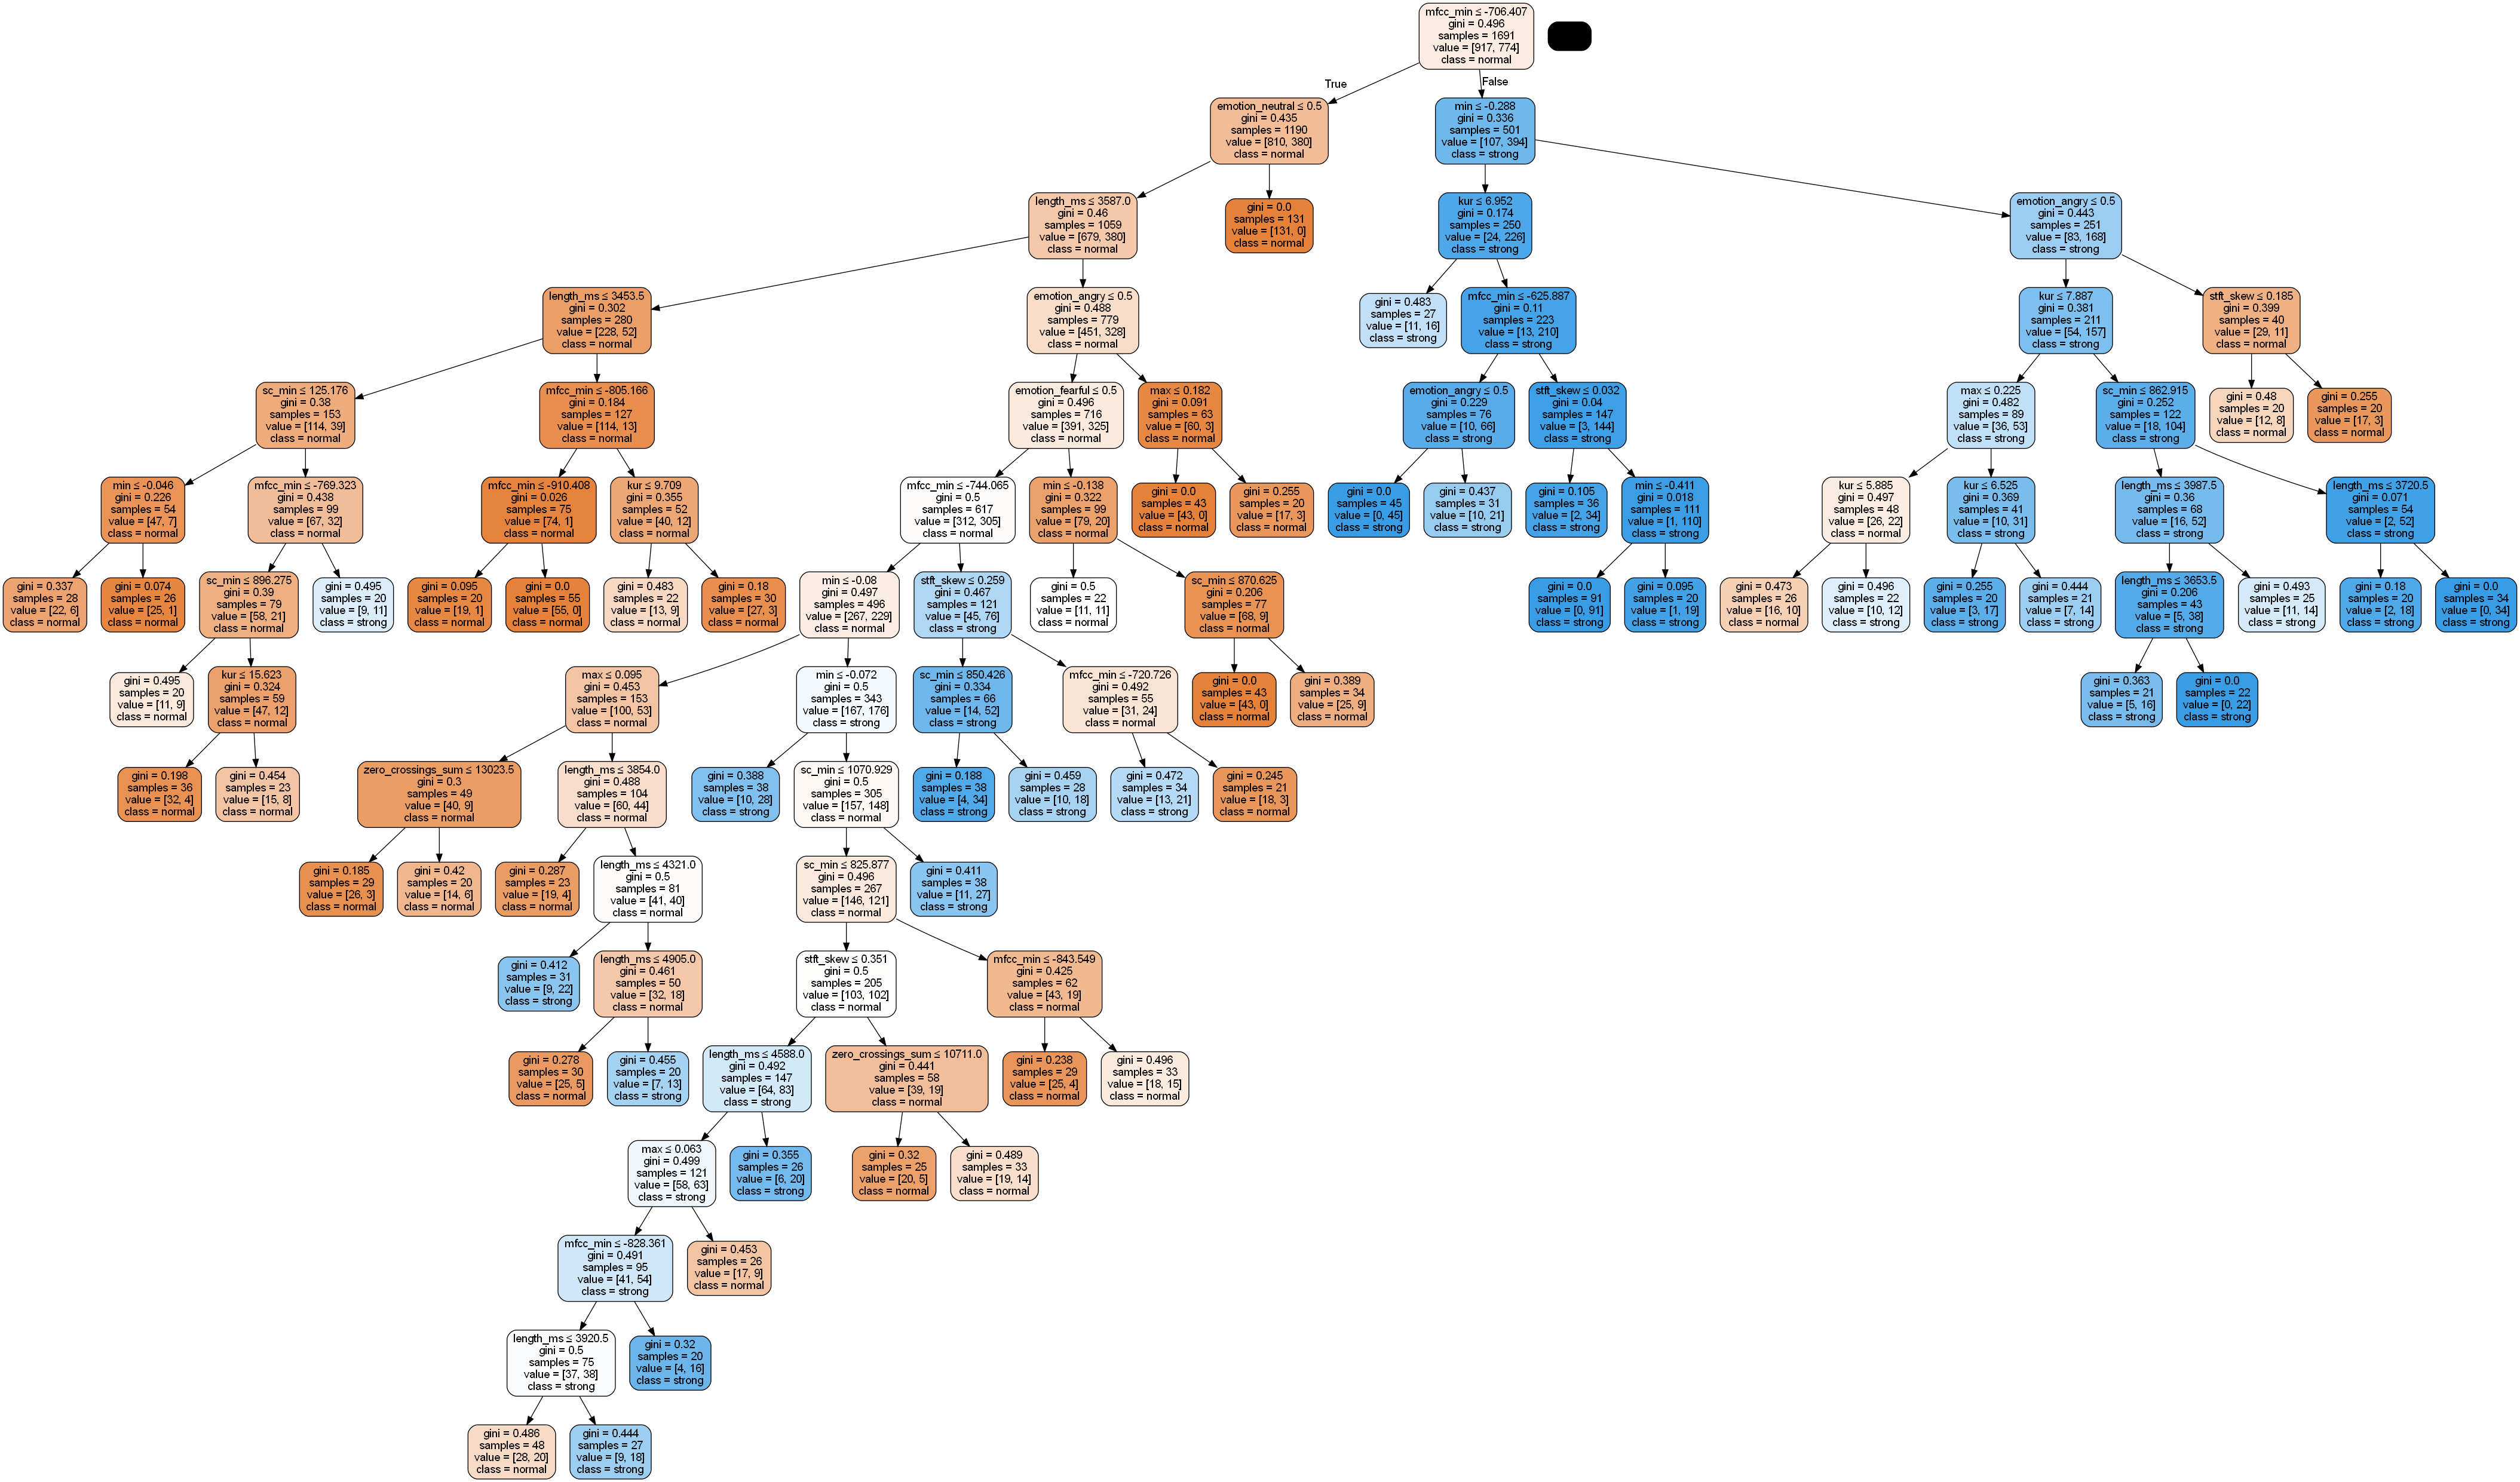

In [30]:
dot_data = tree.export_graphviz(learner, out_file=None,
                                feature_names=feature_importanti,
                                class_names=['strong' if x == 1 else 'normal' for x in clf.classes_],  
                                filled=True, rounded=True,  
                                special_characters=True,
                                max_depth=15)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())